# Checkpoint 4: Simple Monte Carlo Generation of Pseudo Experiments ("toys")

None of the 'stretch' tasks are included in this version.

In [133]:
# standard imports
import numpy as np
import matplotlib.pyplot as plt

In [134]:
# Define our experiments
tau = 2.2 # true lifetime in microseconds
max_t = 10.0 # exclude decay times beyond max_t
num_decays = 1000 # per experiment
num_experiments = 500

In [135]:
def calc_exp_prob_density(x, tau):
    # calculate the probability density from exponential distribution for a given decay time
    return (1.0/tau)*np.exp(-(x/tau))

In [136]:
def plot_exp_hist(tau, max_t, data):
    # plot a histogram of decay times for a single experiment
    fig, ax = plt.subplots(figsize=(10,6))
    # dsnsity=True makes normalised pdf
    ax.hist(data,
            bins=30,
            density=True,
            label='Experiment lifetimes')
    x = np.linspace(0, max_t, 1000)
    # plot true exponential pdf on top to check our histogram agrees
    ax.plot(x,
            calc_exp_prob_density(x, tau),
            'r-',
            label='True pdf')
    # draw legend
    ax.legend(loc='upper right')
    ax.set_xlabel('decay time / microsecond')
    ax.set_ylabel('probability density')
    plt.show()

In [137]:
def calc_single_lifetime(tau, max_t, num_decays, plotted=True):
    # returns the lifetime estimate for a single experiment from 1000 decays
    lifetimes = []
    while len(lifetimes) < num_decays:
        lifetime = np.random.exponential(tau)
        # filter out decay times less than defined maximum threshold
        if lifetime < max_t:
            lifetimes.append(lifetime)
    lifetimes = np.array(lifetimes)
    # histogram may be plotted
    if not plotted:
        plot_exp_hist(tau, max_t, lifetimes)
    # special feature of exponentially distributed measurements, final estimate is average of recorded decay times
    tau_estimate = np.mean(lifetimes)
    return tau_estimate

In [138]:
single_estimate = calc_single_lifetime(tau, max_t, num_decays)
print('Values in microseconds')
print('The estimate from a single repeat of the experiment: ',single_estimate)
print('The size of the difference between this estimate and the true lifetime is: ', tau - single_estimate)

Values in microseconds
The estimate from a single repeat of the experiment:  2.0655175246831488
The size of the difference between this estimate and the true lifetime is:  0.13448247531685142


This is less than the true muon lifetime as expected and the source of the bias is discussed at the end.

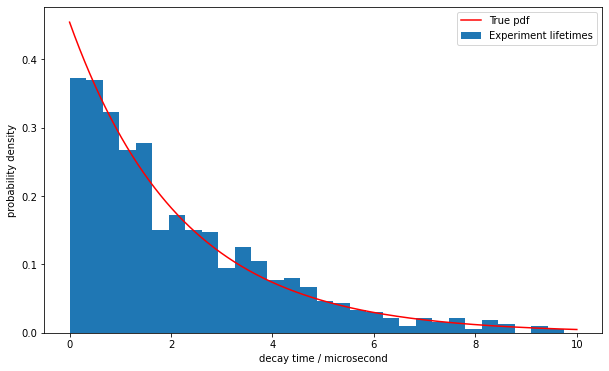

In [139]:
# Plot a histogram for first experiment
plotted = False
full_results = []
for i in range(num_experiments):
    full_results.append(calc_single_lifetime(tau, max_t, num_decays, plotted))
    # Once the data from first experiment is plotted, don't need to plot more
    plotted = True

The histogram shape roughly matches that of the underlying exponential probability density function as expected.

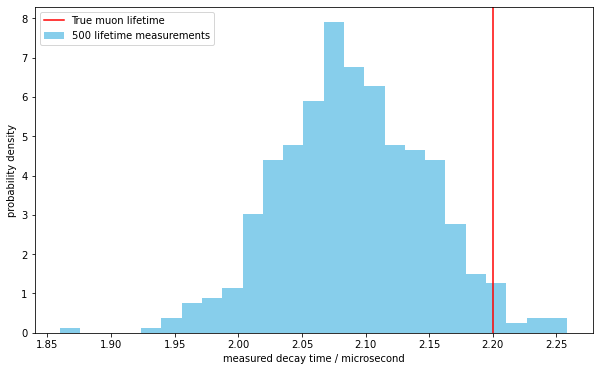

In [140]:
# Plot histogram of estimates from all repeated experiments
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(full_results,
        color = "skyblue",
        bins=25,
        density=True,
        label='{} lifetime measurements'.format(num_experiments))
# Draw on line for true muon lifetime
ax.axvline(x=tau, color='r', label='True muon lifetime')
# Draw legend
ax.legend(loc='upper left')
ax.set_xlabel('measured decay time / microsecond')
ax.set_ylabel('probability density')
plt.show()

The histogram of the set of 500 repeated experiments looks roughly like a gaussian distribution so assuming gaussian error is reasonable. The true lifetime is the red line so we can see there is bias.

In [141]:
# Statistics on full results
# mean
measured_mean = np.mean(full_results)
# standard deviation, ddof=1 means denominator is N-1 rather than N, as this is a limited sample distribution
measured_st_dev = np.std(full_results, ddof=1)
# standard error on the mean
measured_st_error_mean = measured_st_dev / (num_experiments)**0.5
# bias, if > 0 then our estimate was low
bias = tau - measured_mean

In [142]:
print('All values in microseconds')
print('')
print('The error on a measurement from a single experiment is the standard deviation of the above distribution, hence error on a measurement from a single experiment is: ', measured_st_dev)
print('')
print('Our best estimate for the muon lifetime is the measured mean over the 500 repeats: ', measured_mean)
print('')
print('The bias is the difference between the measured mean over the 500 repeats and the true value of tau, hence bias is: ', bias)
print('')
print('The error on the bias is the same as the standard error on the measured mean, hence error on bias is: ', measured_st_error_mean)

All values in microseconds

The error on a measurement from a single experiment is the standard deviation of the above distribution, hence error on a measurement from a single experiment is:  0.0578293962595016

Our best estimate for the muon lifetime is the measured mean over the 500 repeats:  2.0903366295324566

The bias is the difference between the measured mean over the 500 repeats and the true value of tau, hence bias is:  0.1096633704675436

The error on the bias is the same as the standard error on the measured mean, hence error on bias is:  0.002586209222680353


There is clearly bias as we cas see the mean of our measurements differs from the true lifetime. Our mean is lower than the true lifetime because we truncated our measured decay times at the high end by only recording decays less than 10 microseconds. This means each experiment reports a decay time biased to be lower than it should be. Removing the upper threshold would minimise this bias.

- A single muon decay time is an exponentially distributed random variable (as shown in the first figure)
- In a single experiment we average over 1000 decays which is essentially adding together 1000 exponentially distributed random variables so we argue, using the cental limit theormem, that the average of those will tend towards being gaussian distributed (as shown in the second figure) with some underlying mean and standard deviation 
- Therefore, we can use familiar Gaussian error framework where the standard deviation of the gaussian is the error or a single measurement. We carried out a set of 500 repeat measurements and although the underlying mean and standard deviation is unchanged we do increase our precision on the mean (the mean being our best estimate for muon lifetime).
- That precision is given by the standard error on the mean. Our bias is the difference between our mean and the true value and we take the true value to have no error so our standard error on the mean is also our error on the bias